In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
fifa_data=pd.read_csv("fifa_data.csv")
fifa_data


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [9]:
#1
country_counts=fifa_data['Nationality'].value_counts()
top_country=country_counts.idxmax()
top_country_count=country_counts.max()
print(f"Country with most number of players: {top_country} ({top_country_count} players) ")

Country with most number of players: England (1662 players) 


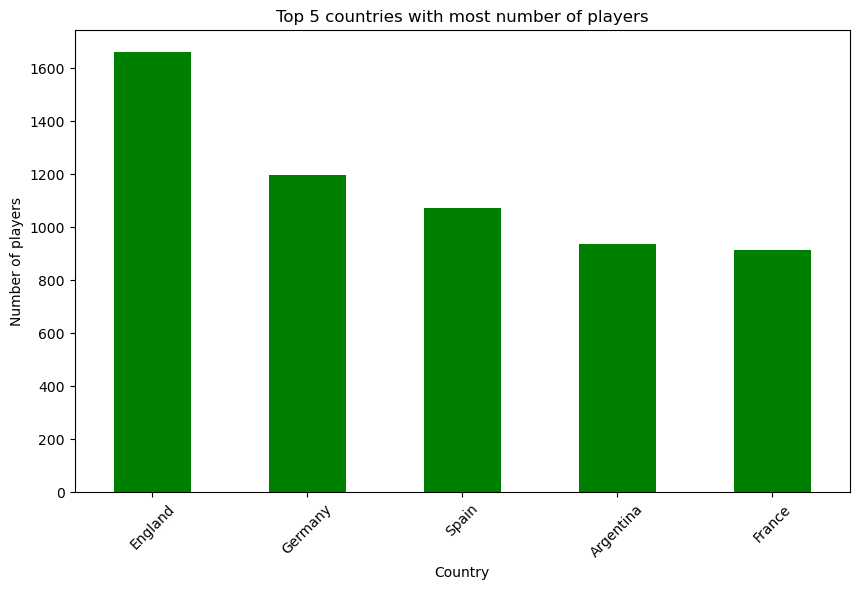

In [15]:
#2
top_5_countries=country_counts.head(5)
plt.figure(figsize=(10,6))
top_5_countries.plot(kind='bar', color='green')
plt.title("Top 5 countries with most number of players")
plt.xlabel("Country")
plt.ylabel("Number of players")
plt.xticks(rotation=45)
plt.show()

In [17]:
#3
fifa_data['Wage']=fifa_data['Wage'].replace('[\€K]','', regex=True).astype(float)*1000
highest_salary_player=fifa_data.loc[fifa_data['Wage'].idxmax()]
print(f"Player with highest salary: {highest_salary_player['Name']} with a salary of {highest_salary_player['Wage']}")

Player with highest salary: L. Messi with a salary of 565000.0


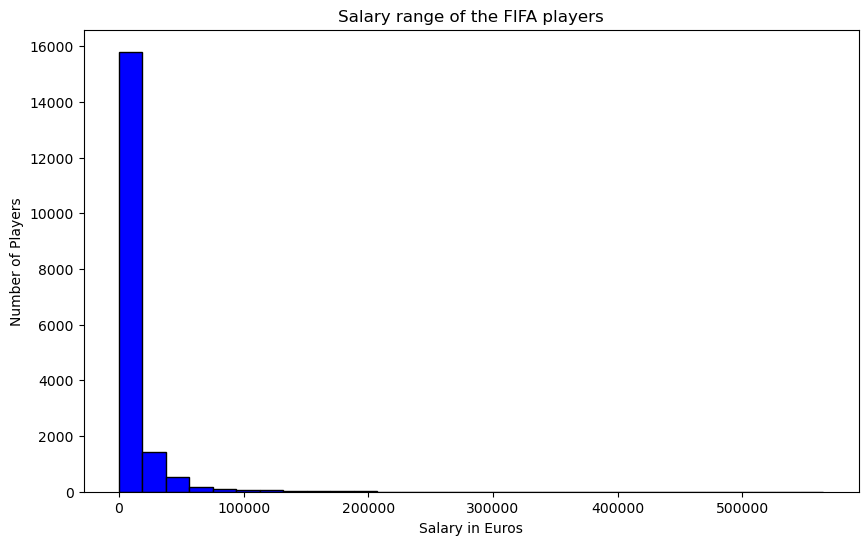

In [19]:
#4
plt.figure(figsize=(10,6))
plt.hist(fifa_data['Wage'], bins=30, color='blue', edgecolor='black')
plt.title("Salary range of the FIFA players")
plt.xlabel("Salary in Euros")
plt.ylabel("Number of Players")
plt.show()

In [54]:
#5
def feet_inches_to_cm(height):
    if isinstance(height, str): 
        feet, inches = height.split("'")
        feet = int(feet)
        inches = int(inches)
        return feet * 30.48 + inches * 2.54
    else:
        return 5 * 30.48 + 7 * 2.54

fifa_data['Height'] = fifa_data['Height'].apply(feet_inches_to_cm)

tallest_player = fifa_data.loc[fifa_data['Height'].idxmax()]
print(f"Tallest player: {tallest_player['Name']} with a height of {tallest_player['Height']} cm")

Tallest player: L. Messi with a height of 170.18 cm


In [38]:
#6
club_counts=fifa_data['Club'].value_counts()
top_club=club_counts.idxmax()
top_club_count=club_counts.max()
print(f"Club with most number of players: {top_club} ({top_country_count} players) ")

Club with most number of players: FC Barcelona (33 players) 


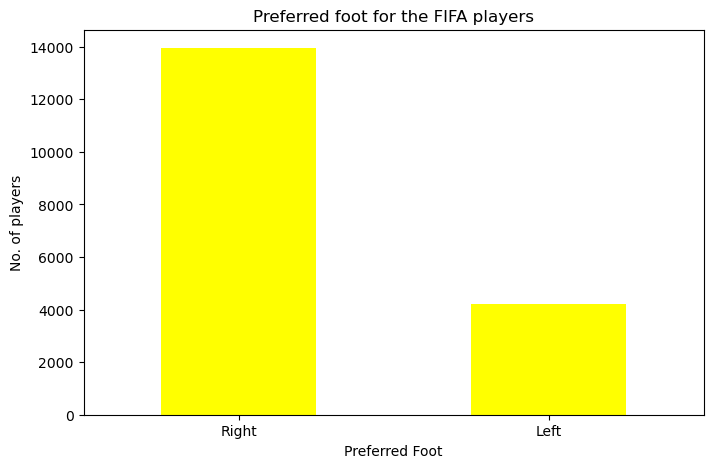

In [44]:
#7
preferred_foot_counts=fifa_data['Preferred Foot'].value_counts()
plt.figure(figsize=(8,5))
preferred_foot_counts.plot(kind='bar',color='Yellow')
plt.title("Preferred foot for the FIFA players")
plt.xlabel("Preferred Foot")
plt.ylabel("No. of players")
plt.xticks(rotation=0)
plt.show()